In [1]:
import workflow as wf
import pandas as pd
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
import importlib
importlib.reload(wf)

<module 'workflow' from 'C:\\Users\\Ceiec02\\OneDrive\\Universidad\\CEIEC\\PFG\\aneurismas\\Métodos\\workflow\\workflow.py'>

In [3]:
tf.keras.backend.clear_session()

In [5]:
tf.compat.v1.disable_v2_behavior()

# Haberman dataset

In [6]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
missing_values = [' ', 'NaN', 'na', 'Na', '-', '--', 'n/a', '?']
columns = ['age', 'year', 'nodes', 'class']
data = pd.read_csv(url, na_values = missing_values, header=None, names=columns)

In [7]:
data

,age,year,nodes,class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


data_encoded = wf.ordinal_encoding(data)

datos_kruskal = wf.kruskal_wallis_test(data, 'class')

datos_kruskal.shape

wf.imputation_tests(datos_kruskal, 'class')

In [8]:
data_dropped = wf.drop_missing_values_columns(data, 5)

In [9]:
data_dropped.shape

(306, 4)

In [10]:
datos_mode = wf.mode_imputation(data_dropped, 'class')

In [14]:
mse = mean_squared_error(np.nan_to_num(data_dropped), datos_mode, squared=False)

In [15]:
mse

0.0

In [16]:
datos_mode['class'].value_counts()

1    225
2     81
Name: class, dtype: int64

In [17]:
data_std = wf.min_max_normalization(datos_mode)

## Raw training

In [19]:
data_std_dropped = data_std.drop(columns = ['class'])

In [20]:
x_train, x_test, y_train, y_test, network_output = wf.prep_datos_red('class' , data_std, data_std_dropped)

(244, 3) (62, 3)
(244, 1) (62, 1)


In [21]:
best_params = {'batch_size': 16, 'dropout_rate': 0.25, 'epochs': 500, 'neurons': 1024, 'hidden_layers': 4}

In [22]:
tf.keras.backend.clear_session()

In [23]:
best_model = wf.create_functional_model(hidden_layers=best_params['hidden_layers'], shape=x_train.shape[1], dropout_rate=best_params['dropout_rate'], neurons=best_params['neurons'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 195 samples, validate on 49 samples
Epoch 1/500
195/195 - 1s - loss: 0.6119 - acc: 0.7179 - val_loss: 0.6504 - val_acc: 0.6327
Epoch 2/500
195/195 - 0s - loss: 0.6077 - acc: 0.7590 - val_loss: 0.6364 - val_acc: 0.6327
Epoch 3/500
195/195 - 0s - loss: 0.5721 - acc: 0.7590 - val_loss: 0.6741 - val_acc: 0.6327
Epoch 4/500
195/195 - 0s - loss: 0.5458 - acc: 0.7590 - val_loss: 0.6718 - val_acc: 0.6327
Epoch 5/500
195/195 - 0s - loss: 0.5404 - acc: 0.7590 - val_loss: 0.6397 - val_acc: 0.6327
Epoch 6/500
195/195 - 0s - loss: 0.5589 - acc: 0.7590 - val_loss: 0.6874 - val_acc: 0.6327
Epoch 7/500
195/195 - 0s - loss: 0.5491 - acc: 0.7590 - val_loss: 0.6268 - val_acc: 0.6327
Epoch 8/500
195/195 - 0s - loss: 0.5299 - acc: 0.7590 - val_loss: 0.6047 - val_acc: 0.6327
Epoch 9/500
195/195 - 0s - loss: 0.5281 - acc: 0.7538 - val_loss: 0.6891 - val_acc: 0.6327
Epoch 10/500
195/195 - 0s - loss: 0.5200 - acc: 0.7590 - val_loss: 0.5867 - val_acc: 0.6327
Epoch 11/500
195/195 - 0s - loss: 0.5151 - a

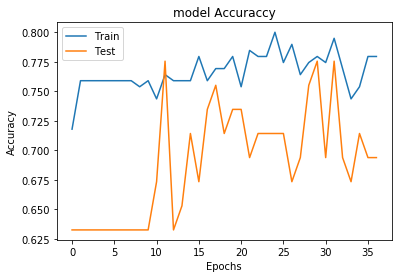

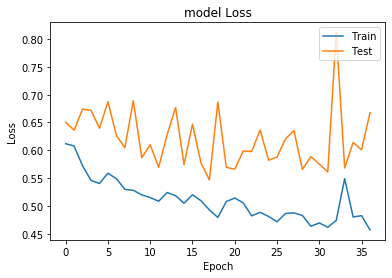

In [24]:
best_model_train = wf.train_model(best_model, best_params, x_train, y_train, patience=25)

Classification Report

              precision    recall  f1-score   support

           0     0.6000    0.1875    0.2857        16
           1     0.7719    0.9565    0.8544        46

    accuracy                         0.7581        62
   macro avg     0.6860    0.5720    0.5700        62
weighted avg     0.7276    0.7581    0.7076        62



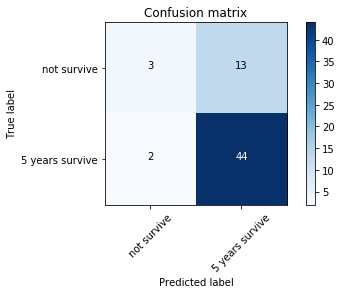

In [25]:
predicts = wf.predict_model_and_report(best_model, x_test, y_test, ['not survive', '5 years survive'])

## Balanced training

In [26]:
data_balanced = wf.smote_tomed_link(data_std, 'class')

In [27]:
data_balanced['class'].value_counts()

1.0    225
0.0    206
Name: class, dtype: int64

In [28]:
data_balanced_dropped = data_balanced.drop(columns = ['class'])

In [29]:
x_train, x_test, y_train, y_test, network_output = wf.prep_datos_red('class' , data_balanced, data_balanced_dropped)

(344, 3) (87, 3)
(344, 1) (87, 1)


In [30]:
best_params

{'batch_size': 16,
 'dropout_rate': 0.25,
 'epochs': 500,
 'neurons': 1024,
 'hidden_layers': 4}

In [35]:
tf.keras.backend.clear_session()

In [36]:
best_model = wf.create_functional_model(hidden_layers=best_params['hidden_layers'], shape=x_train.shape[1], dropout_rate=best_params['dropout_rate'], neurons=best_params['neurons'])

Train on 275 samples, validate on 69 samples
Epoch 1/500
275/275 - 0s - loss: 0.7033 - acc: 0.5127 - val_loss: 0.6861 - val_acc: 0.5507
Epoch 2/500
275/275 - 0s - loss: 0.6848 - acc: 0.5091 - val_loss: 0.6549 - val_acc: 0.5507
Epoch 3/500
275/275 - 0s - loss: 0.6956 - acc: 0.5564 - val_loss: 0.6645 - val_acc: 0.5217
Epoch 4/500
275/275 - 0s - loss: 0.6684 - acc: 0.5745 - val_loss: 0.6227 - val_acc: 0.7391
Epoch 5/500
275/275 - 0s - loss: 0.6989 - acc: 0.5673 - val_loss: 0.6774 - val_acc: 0.5797
Epoch 6/500
275/275 - 0s - loss: 0.6856 - acc: 0.5745 - val_loss: 0.6181 - val_acc: 0.7101
Epoch 7/500
275/275 - 0s - loss: 0.6796 - acc: 0.5964 - val_loss: 0.6490 - val_acc: 0.6377
Epoch 8/500
275/275 - 0s - loss: 0.6597 - acc: 0.6255 - val_loss: 0.6216 - val_acc: 0.6377
Epoch 9/500
275/275 - 0s - loss: 0.6595 - acc: 0.6182 - val_loss: 0.6341 - val_acc: 0.6087
Epoch 10/500
275/275 - 0s - loss: 0.6559 - acc: 0.6073 - val_loss: 0.5945 - val_acc: 0.7101
Epoch 11/500
275/275 - 0s - loss: 0.6071 - a

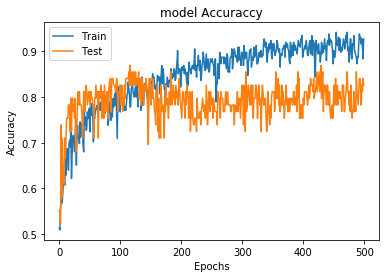

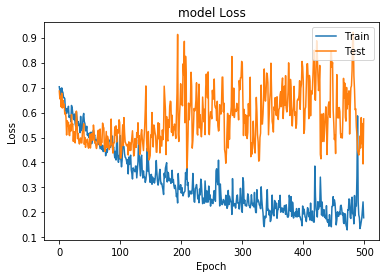

In [37]:
best_model_train = wf.train_model(best_model, best_params, x_train, y_train, patience=500)

Classification Report

              precision    recall  f1-score   support

           0     0.7925    0.9333    0.8571        45
           1     0.9118    0.7381    0.8158        42

    accuracy                         0.8391        87
   macro avg     0.8521    0.8357    0.8365        87
weighted avg     0.8501    0.8391    0.8372        87



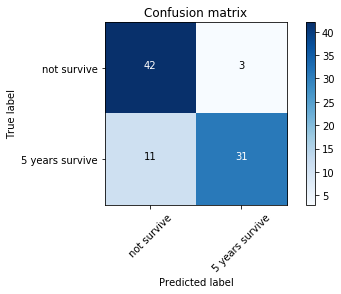

In [38]:
predicts = wf.predict_model_and_report(best_model, x_test, y_test, ['not survive', '5 years survive'])

# Oil Spill dataset

In [95]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
missing_values = [' ', 'NaN', 'na', 'Na', '-', '--', 'n/a', '?']
columns = ['class']
data = pd.read_csv(url, na_values = missing_values, header=None)

In [96]:
data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200.0,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100.0,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400.0,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000.0,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


data_encoded = wf.ordinal_encoding(data)

datos_kruskal = wf.kruskal_wallis_test(data, 'class')

datos_kruskal.shape

wf.imputation_tests(datos_kruskal, 'class')

In [97]:
data_dropped = wf.drop_missing_values_columns(data, 5)

In [98]:
data_dropped.shape

(937, 50)

In [99]:
datos_mode = wf.mode_imputation(data_dropped, 49)

In [100]:
mse = mean_squared_error(np.nan_to_num(data_dropped), datos_mode, squared=False)

In [101]:
mse

0.0

In [102]:
datos_mode[49].value_counts()

0.0    896
1.0     41
Name: 49, dtype: int64

In [103]:
data_std = wf.min_max_normalization(datos_mode)

In [104]:
data_std

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.078693,0.795369,0.167291,0.500000,0.088774,0.319870,0.295893,0.181873,0.236111,...,0.238507,0.086957,0.079550,0.077489,0.048675,0.0,0.587669,0.976721,0.222222,1.0
1,0.002849,0.689181,0.040816,0.308430,1.000000,0.782405,0.486482,0.015926,0.382532,0.000000,...,0.481199,1.000000,1.000000,0.943179,0.007830,0.0,0.932995,0.976393,0.046729,0.0
2,0.005698,0.003243,0.765631,0.223027,0.488889,0.003048,0.312378,0.272842,0.016699,0.222222,...,0.117161,0.021739,0.015636,0.025816,0.121754,1.0,0.558460,0.979016,0.210800,1.0
3,0.008547,0.036783,0.825213,0.108185,0.366667,0.041157,0.344625,0.299246,0.108469,0.236111,...,0.505595,0.066224,0.047241,0.082929,0.173953,1.0,0.671567,0.974426,0.234683,1.0
4,0.011396,0.009327,0.501465,0.161501,0.205556,0.009961,0.328827,0.259849,0.016761,0.208333,...,0.110470,0.061794,0.053426,0.062444,0.033668,0.0,0.508444,0.974098,0.159917,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,0.566952,0.000062,0.047854,0.133435,0.750000,0.000377,0.621824,0.398575,0.001356,0.208333,...,0.031955,0.022136,0.008845,0.084073,0.058724,0.0,0.010212,0.980328,0.060228,0.0
933,0.569801,0.000031,0.051238,0.090925,0.883333,0.000264,0.625407,0.391869,0.001025,0.208333,...,0.023817,0.015652,0.015636,0.029723,0.024794,0.0,0.043517,0.975410,0.074766,0.0
934,0.572650,0.000124,0.012278,0.157095,0.133333,0.000605,0.633550,0.717100,0.001124,0.388889,...,0.033683,0.015652,0.018763,0.000000,0.029231,0.0,0.001913,0.982295,0.032191,0.0
935,0.575499,0.000000,0.049747,0.165334,0.377778,0.000150,0.629642,0.594300,0.001025,0.319444,...,0.033683,0.015652,0.009381,0.042033,0.058332,0.0,0.006970,0.984262,0.052960,0.0


## Raw training

In [105]:
data_std_dropped = data_std.drop(columns = [49])

In [106]:
x_train, x_test, y_train, y_test, network_output = wf.prep_datos_red(49 , data_std, data_std_dropped)

(749, 49) (188, 49)
(749, 1) (188, 1)


In [107]:
best_params = {'batch_size': 16, 'dropout_rate': 0.25, 'epochs': 25, 'neurons': 16, 'hidden_layers': 4}

In [108]:
tf.keras.backend.clear_session()

In [109]:
best_model = wf.create_functional_model(hidden_layers=best_params['hidden_layers'], shape=x_train.shape[1], dropout_rate=best_params['dropout_rate'], neurons=best_params['neurons'])

Train on 599 samples, validate on 150 samples
Epoch 1/25
599/599 - 0s - loss: 0.4840 - acc: 0.9199 - val_loss: 0.2956 - val_acc: 0.9400
Epoch 2/25
599/599 - 0s - loss: 0.2371 - acc: 0.9516 - val_loss: 0.2296 - val_acc: 0.9400
Epoch 3/25
599/599 - 0s - loss: 0.2309 - acc: 0.9583 - val_loss: 0.2283 - val_acc: 0.9400
Epoch 4/25
599/599 - 0s - loss: 0.2321 - acc: 0.9599 - val_loss: 0.2215 - val_acc: 0.9400
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 49)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                800       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)            

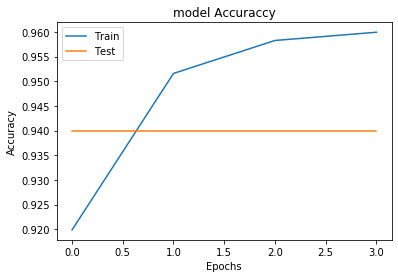

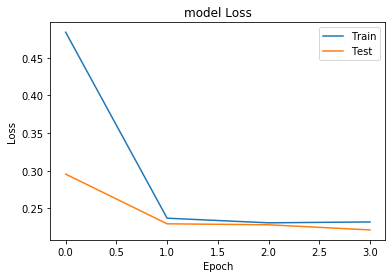

In [110]:
best_model_train = wf.train_model(best_model, best_params, x_train, y_train, patience=3)

Classification Report

              precision    recall  f1-score   support

           0     0.9574    1.0000    0.9783       180
           1     0.0000    0.0000    0.0000         8

    accuracy                         0.9574       188
   macro avg     0.4787    0.5000    0.4891       188
weighted avg     0.9167    0.9574    0.9366       188



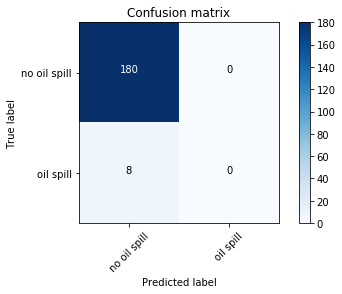

In [111]:
predicts = wf.predict_model_and_report(best_model, x_test, y_test, ['no oil spill', 'oil spill'])

## Balanced training

In [112]:
data_balanced = wf.smote_tomed_link(data_std, 49)

In [113]:
data_balanced[49].value_counts()

0.0    896
1.0    896
Name: 49, dtype: int64

In [114]:
data_balanced_dropped = data_balanced.drop(columns = [49])

In [115]:
x_train, x_test, y_train, y_test, network_output = wf.prep_datos_red(49 , data_balanced, data_balanced_dropped)

(1433, 49) (359, 49)
(1433, 1) (359, 1)


In [116]:
best_params

{'batch_size': 16,
 'dropout_rate': 0.25,
 'epochs': 25,
 'neurons': 16,
 'hidden_layers': 4}

In [121]:
tf.keras.backend.clear_session()

In [122]:
best_model = wf.create_functional_model(hidden_layers=best_params['hidden_layers'], shape=x_train.shape[1], dropout_rate=best_params['dropout_rate'], neurons=best_params['neurons'])

Train on 1146 samples, validate on 287 samples
Epoch 1/25
1146/1146 - 0s - loss: 0.6910 - acc: 0.5105 - val_loss: 0.6861 - val_acc: 0.5923
Epoch 2/25
1146/1146 - 0s - loss: 0.6753 - acc: 0.5681 - val_loss: 0.6552 - val_acc: 0.6341
Epoch 3/25
1146/1146 - 0s - loss: 0.6297 - acc: 0.6571 - val_loss: 0.5709 - val_acc: 0.7979
Epoch 4/25
1146/1146 - 0s - loss: 0.5672 - acc: 0.7251 - val_loss: 0.4635 - val_acc: 0.8328
Epoch 5/25
1146/1146 - 0s - loss: 0.4747 - acc: 0.7932 - val_loss: 0.4006 - val_acc: 0.8397
Epoch 6/25
1146/1146 - 0s - loss: 0.4122 - acc: 0.8490 - val_loss: 0.3542 - val_acc: 0.8571
Epoch 7/25
1146/1146 - 0s - loss: 0.3755 - acc: 0.8534 - val_loss: 0.3221 - val_acc: 0.8676
Epoch 8/25
1146/1146 - 0s - loss: 0.3045 - acc: 0.8901 - val_loss: 0.2807 - val_acc: 0.8780
Epoch 9/25
1146/1146 - 0s - loss: 0.2920 - acc: 0.9005 - val_loss: 0.2565 - val_acc: 0.8990
Epoch 10/25
1146/1146 - 0s - loss: 0.2642 - acc: 0.9031 - val_loss: 0.2473 - val_acc: 0.9059
Epoch 11/25
1146/1146 - 0s - los

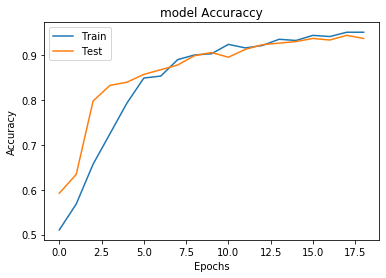

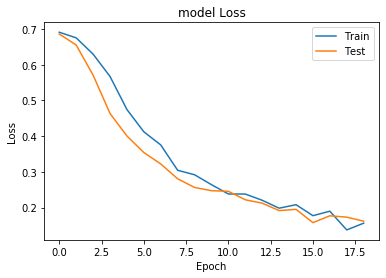

In [123]:
best_model_train = wf.train_model(best_model, best_params, x_train, y_train, patience=3)

Classification Report

              precision    recall  f1-score   support

           0     0.9605    0.9444    0.9524       180
           1     0.9451    0.9609    0.9529       179

    accuracy                         0.9526       359
   macro avg     0.9528    0.9527    0.9526       359
weighted avg     0.9528    0.9526    0.9526       359



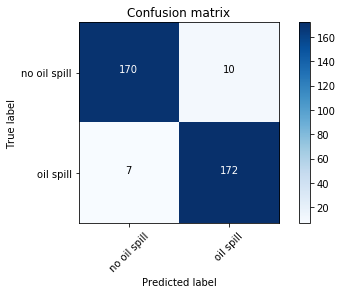

In [124]:
predicts = wf.predict_model_and_report(best_model, x_test, y_test, ['no oil spill', 'oil spill'])